In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils.validation import check_is_fitted
from sklearn.metrics import plot_confusion_matrix
from scipy.stats import mode

from sklearn.metrics import balanced_accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder

import os
os.chdir("..")

import random
from tqdm import tqdm
from pathlib import Path
import numpy as np
import cv2
from joblib import Parallel, delayed, parallel_backend
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV

from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, cohen_kappa_score
from multiprocessing.dummy import Pool
import pandas as pd


from skin_lesion_cad.data.BOVW import DenseDescriptor, BagofWords, ColorDescriptor, LBPDescriptor, DescriptorsTransformer
from skin_lesion_cad.features.colour import ColorFeaturesDescriptor
from skin_lesion_cad.features.colour import ColorFeaturesExtractor
from skin_lesion_cad.features.texture import glcm_features
from skin_lesion_cad.features.texture import get_glcm, lbph

import matplotlib.pyplot as plt
import seaborn as sns

from typing import Counter
from sklearn.base import TransformerMixin, BaseEstimator

import scipy


from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier, EasyEnsembleClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import fbeta_score, make_scorer

from skin_lesion_cad.data.ensemble import EnsemblingClssfifier, classifiers

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


/home/vzalevskyi/uni/MAIA_Semester_3/cad/skin-lesion-cad/skin_lesion_cad/data/ensemble.py:61: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  self.meta_model.fit(np.hstack(predicitons_proba.values()), y)
/home/vzalevskyi/uni/MAIA_Semester_3/cad/skin-lesion-cad/skin_lesion_cad/data/ensemble.py:90: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  predictions['stacking'] = self.meta_model.predict(np.hstack(predicitons_proba.values()))
/home/vzalevskyi/uni/MAIA_Semester_3/cad/skin-lesion-cad/skin_lesion_cad/data/ensemble.py:91: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as ge

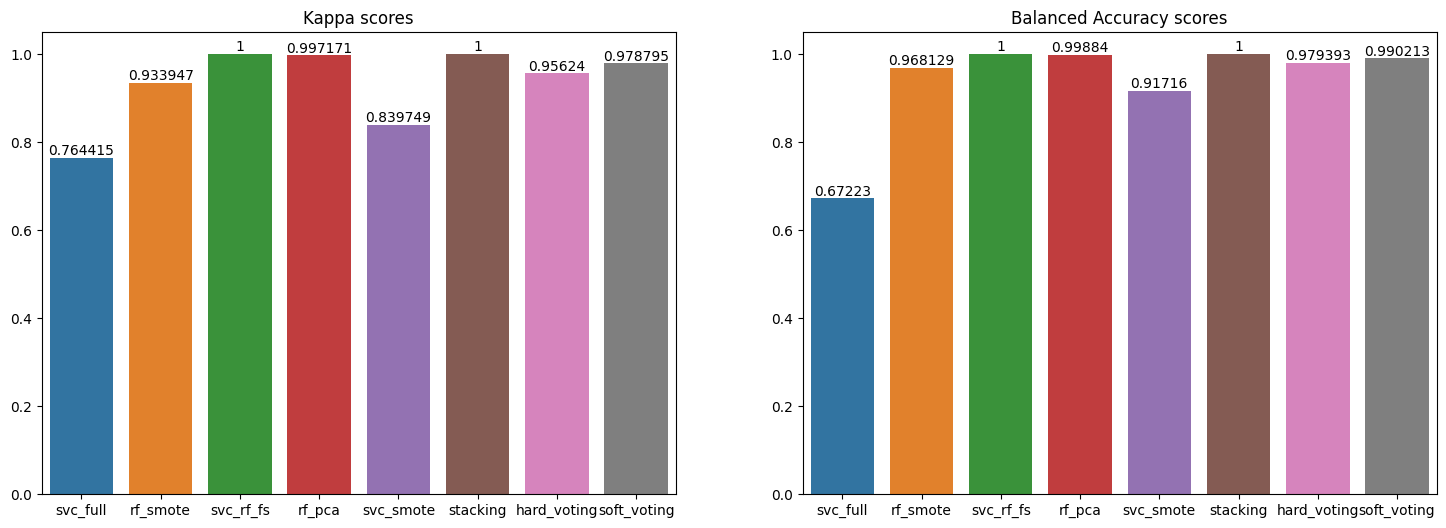

/home/vzalevskyi/uni/MAIA_Semester_3/cad/skin-lesion-cad/skin_lesion_cad/data/ensemble.py:90: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  predictions['stacking'] = self.meta_model.predict(np.hstack(predicitons_proba.values()))
/home/vzalevskyi/uni/MAIA_Semester_3/cad/skin-lesion-cad/skin_lesion_cad/data/ensemble.py:91: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  predicitons_proba['stacking'] = self.meta_model.predict_proba(np.hstack(predicitons_proba.values()))


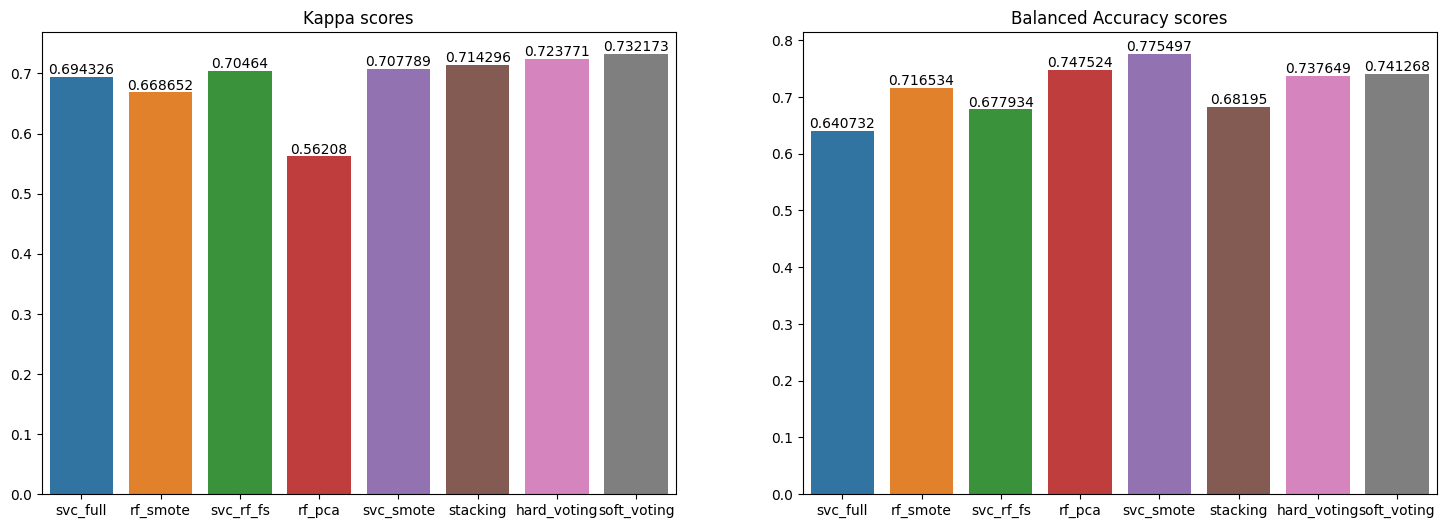

In [6]:
merged_df_val = pd.read_pickle('merged_df_val.pkl')
merged_df_train = pd.read_pickle('merged_df_train.pkl')
merged_df_TEST = pd.read_pickle('merged_df_TEST.pkl')

X_train = merged_df_train.drop(columns=['class'])
X_test = merged_df_val.drop(columns=['class'])
y_train = merged_df_train['class']
y_test = merged_df_val['class']


ens = EnsemblingClssfifier(classifiers, ['soft_voting', 'stacking', 'hard_voting'])

ens.fit(X_train.values, y_train.values, X_train.columns)
predictions, predicitons_proba = ens.predict(X_test.values, X_test.columns)
kappa_scores, balacc_scores = ens.evaluate(X_train.values, y_train.values, X_train.columns)
kappa_scores, balacc_scores = ens.evaluate(X_test.values, y_test.values, X_test.columns)

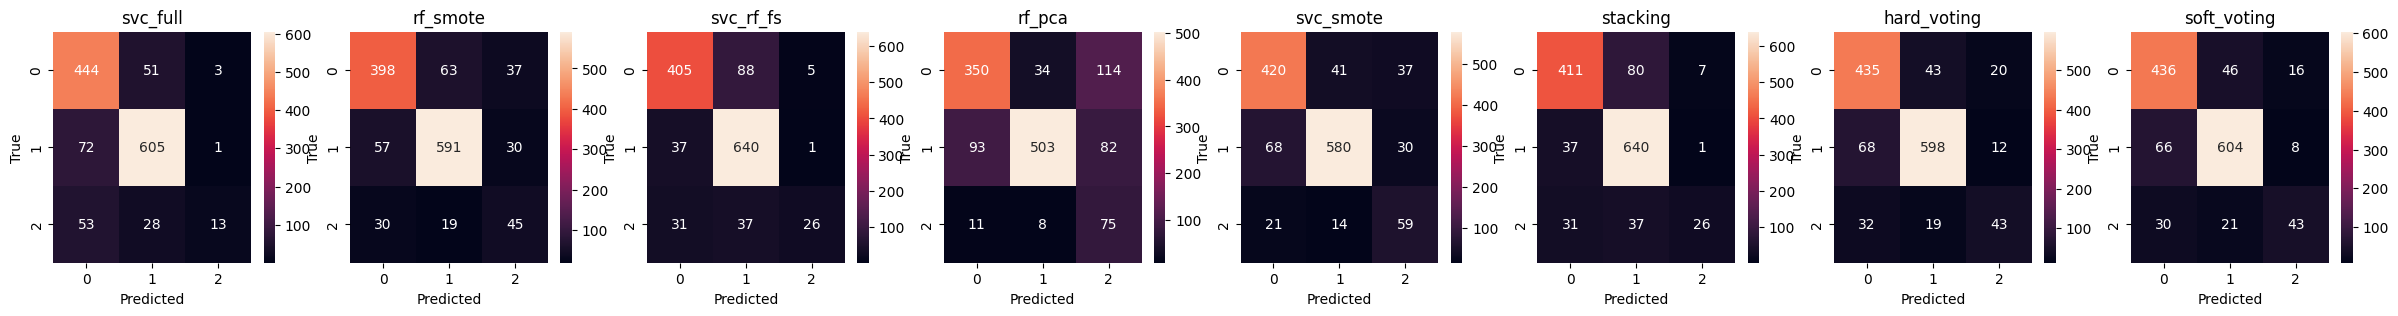

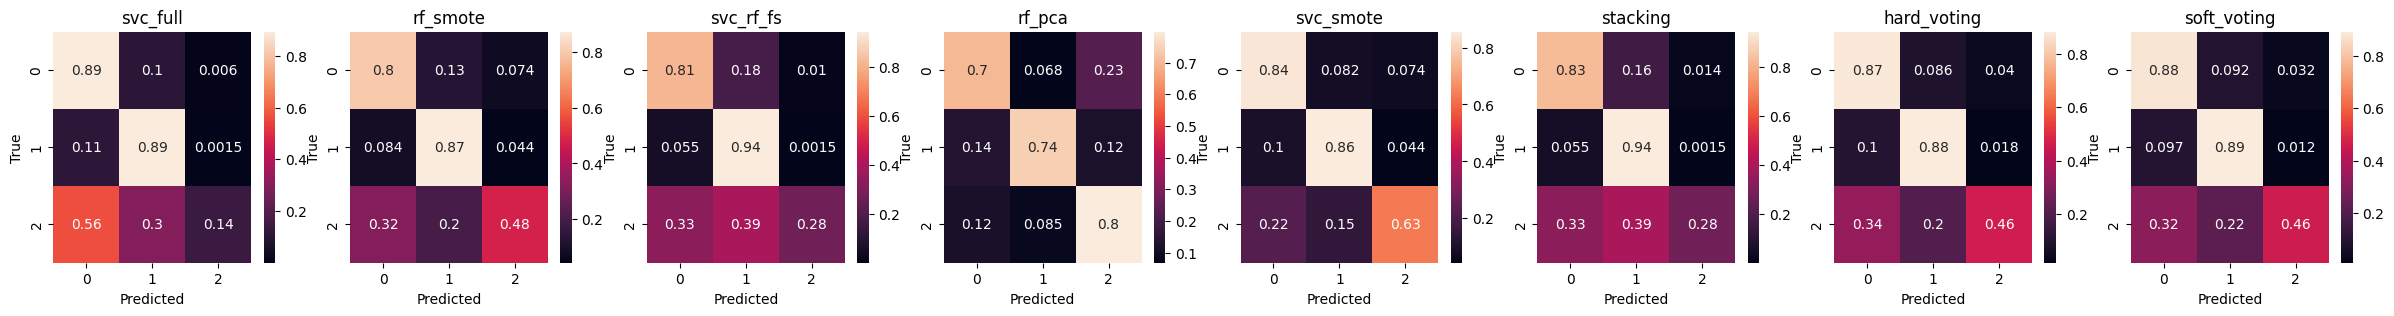

In [7]:
fig, axs = plt.subplots(1, len(predictions), figsize=(30, 3))

for i, (name, pred) in enumerate(predictions.items()):
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', ax=axs[i])
    axs[i].set_title(name)
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('True')
    
plt.show()

fig, axs = plt.subplots(1, len(predictions), figsize=(30, 3))

for i, (name, pred) in enumerate(predictions.items()):
    sns.heatmap(confusion_matrix(y_test, pred, normalize='true'), annot=True, ax=axs[i], )
    axs[i].set_title(name)
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('True')
    
plt.show()

# FIANL ETST

In [6]:
merged_df_val = pd.read_pickle('merged_df_val.pkl')
merged_df_train = pd.read_pickle('merged_df_train.pkl')
merged_df_TEST = pd.read_pickle('merged_df_TEST.pkl')

merged_ALL = pd.concat([merged_df_train, merged_df_val])

X_train = merged_ALL.drop(columns=['class'])
X_test = merged_df_TEST.drop(columns=['class'])
y_train = merged_ALL['class']
y_test = merged_df_TEST['class']


ens = EnsemblingClssfifier(classifiers, ['soft_voting', 'stacking', 'hard_voting'])

ens.fit(X_train.values, y_train.values, X_train.columns)
predictions, predicitons_proba = ens.predict(X_test.values, X_test.columns)

/tmp/ipykernel_15654/1732035255.py:66: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  self.meta_model.fit(np.hstack(predicitons_proba.values()), y)
/tmp/ipykernel_15654/1732035255.py:95: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  predictions['stacking'] = self.meta_model.predict(np.hstack(predicitons_proba.values()))
/tmp/ipykernel_15654/1732035255.py:96: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  predicitons_proba['stacking'] = self.meta_model.predict_proba(np.hstack(predicitons_

/tmp/ipykernel_15654/1732035255.py:95: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  predictions['stacking'] = self.meta_model.predict(np.hstack(predicitons_proba.values()))
/tmp/ipykernel_15654/1732035255.py:96: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  predicitons_proba['stacking'] = self.meta_model.predict_proba(np.hstack(predicitons_proba.values()))


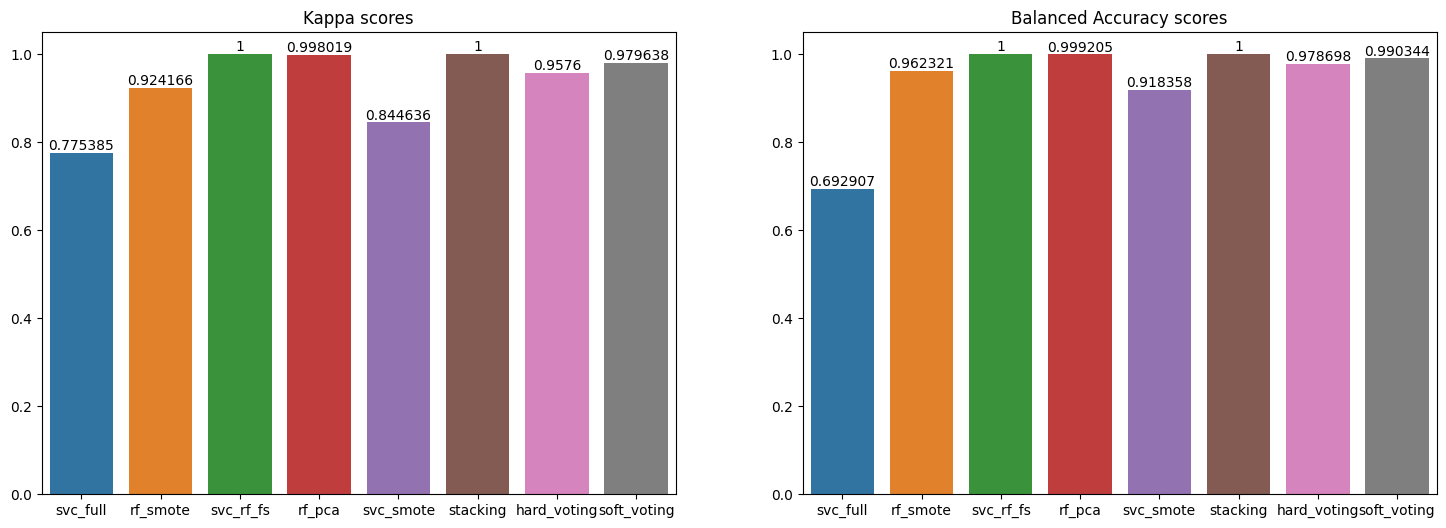

In [7]:
kappa_scores, balacc_scores = ens.evaluate(X_train.values, y_train.values, X_train.columns)

In [8]:
[(k, np.unique(predictions[k], return_counts=True)) for k in predictions.keys()]

[('svc_full', (array([0, 1]), array([ 75, 151]))),
 ('rf_smote', (array([0, 1, 2]), array([ 61, 146,  19]))),
 ('svc_rf_fs', (array([0, 1]), array([ 40, 186]))),
 ('rf_pca', (array([0, 1, 2]), array([ 54, 101,  71]))),
 ('svc_smote', (array([0, 1, 2]), array([ 64, 145,  17]))),
 ('stacking', (array([0, 1]), array([ 40, 186]))),
 ('hard_voting', (array([0, 1, 2]), array([ 68, 153,   5]))),
 ('soft_voting', (array([0, 1, 2]), array([ 66, 153,   7])))]

In [9]:
merged_df_TEST['predicted'] = predictions['svc_smote']

In [40]:
np.unique(predictions['svc_smote'], return_counts=True)

(array([0, 1, 2]), array([ 64, 145,  17]))

In [34]:
merged_df_TEST['predicted'] = predictions['svc_smote']
res = merged_df_TEST['predicted'].reset_index()
res['name'] = res.name.apply(lambda x: x.split('_')[0])
res = res.sort_values('name')

res.predicted = res.predicted.replace({1:0, 0:1})
res.to_csv('chall2_sumb.csv', index=False)
res

,name,predicted
147,xxx0001,0
87,xxx0002,1
59,xxx0003,0
213,xxx0004,1
83,xxx0005,0
...,...,...
90,xxx0222,0
162,xxx0223,1
174,xxx0224,1
89,xxx0225,0
